# Last Versian : V3

In [5]:
import datetime

x = datetime.datetime.now()
print(x)

2020-06-25 14:06:47.125178


# Demand Forecast Project

Data sources that will be used are as below:

1- Sales (3 Years history + ongoing) 
2- Product attributes 
3- Holiday

## Demand Forecast generated for 12-16 weeks out will have below dimensions:

Subclass:

Demand Forecast generated for 12-16 weeks out will have below dimensions:

1- Subclass

2- First 3 digits of zip (Digital)

3- Fiscal weeks

4- Loc ID for Walk IN - optional 

5- Holiday - Y/ N - To indicate if the fiscal week had a major US holiday or not

6- Fulfillment types 
    + BOPUS (webex and common)
    + BOSS (webex and common)
    + STH (webex and common)
    + DSV (webex and common)
    + Walk In

7- Product granularity (TBD)



- Frequency of this demand forecast: Weekly

What will it be compared against for gauging? 

Celect

Actuals TY

Method Sales?? - subclass / week (Actuals LY)

![](cover_1600px_web-1280x640.jpg)

# Add Require Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [7]:
# !unzip Archive.zip

# Concat multiple file csv to one file

In [8]:
path = '.'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename , index_col=None , header = 0)
    li.append(df)

data=pd.concat(li , axis = 0 , ignore_index=True)

In [9]:
data.shape

(13550664, 10)

In [10]:
data.head()

total_sales  total_revenue  advertised_purchases  is_holiday  node  \
0            0            0.0                     0           0   175   
1            0            0.0                     0           0  1318   
2            0            0.0                     0           0   588   
3            0            0.0                     0           0  1453   
4            0            0.0                     0           0   223   

   dept_nbr  cl_nbr  sub_cl_nbr subclass_id beginning_of_week  
0        15      10          10    15-10-10        2020-01-05  
1        15      10          10    15-10-10        2020-05-03  
2        15      10          10    15-10-10        2019-11-24  
3        15      10          10    15-10-10        2019-12-15  
4        15      10          10    15-10-10        2018-12-02

In [11]:
data.describe().T

count        mean         std      min     25%  \
total_sales           13550664.0    5.659553   23.579517     0.00    0.00   
total_revenue         13550664.0   34.378485  122.945536 -1526.76    0.00   
advertised_purchases  13550664.0    3.785171   14.034058     0.00    0.00   
is_holiday            13550664.0    0.298684    2.592713     0.00    0.00   
node                  13550664.0  763.065700  479.594482     7.00  368.75   
dept_nbr              13550664.0  208.170732  254.321095    15.00   15.00   
cl_nbr                13550664.0   47.398374   25.177013    10.00   20.00   
sub_cl_nbr            13550664.0   51.406504   25.387354    10.00   27.00   

                        50%      75%      max  
total_sales             0.0     1.00   2972.0  
total_revenue           0.0     5.99  11802.5  
advertised_purchases    0.0     1.00    736.0  
is_holiday              0.0     0.00    262.0  
node                  688.5  1167.25   6666.0  
dept_nbr               15.0   543.00    543.0  
cl_nbr                 50.0    70.00     90.0  
sub_cl_nbr             54.0    74.00     99.0

# Read data from disk

In [12]:
data['is_holiday'].value_counts().head(5)

0    12740756
1      280672
2      151586
3       91403
4       61147
Name: is_holiday, dtype: int64

In [13]:
data['is_holiday'] = data[['is_holiday']].applymap(lambda x: 1 if x > 1 else 0)
data.is_holiday.value_counts()

0    13021428
1      529236
Name: is_holiday, dtype: int64

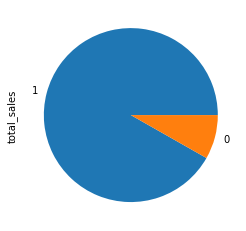

In [14]:
data.groupby("is_holiday").total_sales.mean().sort_values(ascending=False)[:5].plot.pie()

# Convert beginning_of_week to readable for model

In [15]:
print("Min data from dataset:" , data['beginning_of_week'].min())
print("MAX data from dataset:" , data['beginning_of_week'].max())

Min data from dataset: 2018-09-02
MAX data from dataset: 2020-06-14


In [16]:
import datetime
import pandas as pd
# make the new columns using string indexing
data['year'] = data['beginning_of_week'].str[0:4].astype(int)
data['month'] = data['beginning_of_week'].str[5:7].astype(int)
data['day'] = data['beginning_of_week'].str[8:10].astype(int)
data['quarter']=pd.to_datetime(data['beginning_of_week']).dt.quarter
data['smester']=np.where(data.quarter.isin([1,2]), 1 , 2)
data['day_of_year']=pd.to_datetime(data['beginning_of_week']).dt.dayofyear
data['week_of_year']=pd.to_datetime(data.beginning_of_week).dt.weekofyear
data['day_in_Month']=pd.to_datetime(data['beginning_of_week']).dt.days_in_month

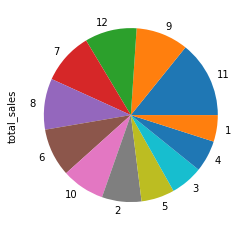

In [17]:
data.groupby("month").total_sales.mean().sort_values(ascending=False)[:12].plot.pie()

In [18]:
data['day_of_year'].value_counts().head(6)

364    144156
124    144156
90     144156
96     144156
97     144156
103    144156
Name: day_of_year, dtype: int64

In [19]:
# import platform,socket,re,uuid,json,psutil,logging

# def getSystemInfo():
#     try:
#         info={}
#         info['platform']=platform.system()
#         info['platform-release']=platform.release()
#         info['platform-version']=platform.version()
#         info['architecture']=platform.machine()
#         info['hostname']=socket.gethostname()
#         info['ip-address']=socket.gethostbyname(socket.gethostname())
#         info['mac-address']=':'.join(re.findall('..', '%012x' % uuid.getnode()))
#         info['processor']=platform.processor()
#         info['ram']=str(round(psutil.virtual_memory().total / (1024.0 **3)))+" GB"
#         return json.dumps(info)
#     except Exception as e:
#         logging.exception(e)

# json.loads(getSystemInfo())

# CHECK MISSING VALUE

In [20]:
data.isnull().sum()

total_sales             0
total_revenue           0
advertised_purchases    0
is_holiday              0
node                    0
dept_nbr                0
cl_nbr                  0
sub_cl_nbr              0
subclass_id             0
beginning_of_week       0
year                    0
month                   0
day                     0
quarter                 0
smester                 0
day_of_year             0
week_of_year            0
day_in_Month            0
dtype: int64

# channel Label Encoder

In [21]:
from sklearn import preprocessing 
def encoding(col):
    label_encod = preprocessing.LabelEncoder()
    data[col] = label_encod.fit_transform(data[col])
    return data[col].value_counts()

# encoding('channel')
encoding('day_of_year')
encoding('year')

    
# WALK-IN = 0
# webex_and_common = 1

1    7496112
2    3459744
0    2594808
Name: year, dtype: int64

# Convert subclass_id without dash on the data

In [22]:
# make string version of original column, call it 'col'
data['subclass_id'] = data['subclass_id'].str.replace(r'-', '').astype(int)
data['subclass_id'].head()

0    151010
1    151010
2    151010
3    151010
4    151010
Name: subclass_id, dtype: int64

In [23]:
import timeit

start = timeit.default_timer()

# Group by date column  in this case "beginning_of_week" and aggregate features.
data_preprocess = data.sort_values('beginning_of_week').groupby([ 'subclass_id', 'is_holiday',
 'node', 'dept_nbr', 'cl_nbr', 'sub_cl_nbr',  'beginning_of_week'   ,                                                          
 'year', 'month', 'day', 'quarter', 'smester', 'day_of_year', 'week_of_year', 'day_in_Month']
 , as_index=False)



In [24]:
# 'total_sales', 'total_revenue', 'advertised_purchases'

In [25]:
data_preprocess = data_preprocess.agg({'total_sales':[np.min, np.mean, np.max , np.sum  ]
})

In [26]:
data_preprocess.columns = [
    'subclass_id', 'is_holiday', 'node', 'dept_nbr', 'cl_nbr', 'sub_cl_nbr',  'beginning_of_week'   ,                                                          
    'year', 'month', 'day', 'quarter', 'smester', 'day_of_year', 'week_of_year', 'day_in_Month',   
    'total_sal_min', 'total_sal_mean' , 'total_sal_max' ,'total_sal_sum'  
]

# Add need column from data

In [27]:
data_preprocess['total_revenue'] = data.total_revenue
data_preprocess['advertised_purchases'] = data.advertised_purchases
data_preprocess['total_sales'] = data.total_sales

# Rolling mean windows 3

In [28]:
# Mean value
f_mean = lambda x: x.rolling(window=3, min_periods=1).mean()



function_list = [f_mean  ]
function_name = ['mean' ]

for i in range(len(function_list)):
    data_preprocess[('total_sales_new_%s' % function_name[i])] = data_preprocess.sort_values('beginning_of_week').groupby([ 'sub_cl_nbr'])['total_sales'].apply(function_list[i])

# Rolling Mean

In [29]:
# Mean value
f_mean = lambda x: x.rolling(window=7, min_periods=1).mean()


function_list = [f_mean]
function_name = ['mean' ]


for i in range(len(function_list)):
    data_preprocess[('revenue_ad_%s' % function_name[i])] = data_preprocess.sort_values('beginning_of_week').groupby([
        'total_revenue', 'advertised_purchases'])['total_sales'].apply(function_list[i])

# Apply Lag based Features

In [30]:
lag_list = [1, 2, 3, 4, 5, 6, 7]


for lag in lag_list:
    ft_name = ('total_sales_shifted%s' % lag)
    data_preprocess[ft_name] = data['total_sales'].shift(lag)
    # Fill the empty shifted features with 0
    data_preprocess[ft_name].fillna(0, inplace=True)

In [31]:
# Lag based features.
lag_list = [1, 2, 3]


for lag in lag_list:
    ft_name = ('total_revenue_shifted%s' % lag)
    data_preprocess[ft_name] = data['total_revenue'].shift(lag)
    # Fill the empty shifted features with 0
    data_preprocess[ft_name].fillna(0, inplace=True)

# Expand value totalsales

In [32]:
# Lag based features.
ex_list = [ 1, 2, 3]


for expand in ex_list:
    ft_name = ('expand_total_sales_%s' % lag)
    data_preprocess[ft_name] = data['total_sales'].expanding(expand).mean()
    # Fill the empty shifted features with 0
    data_preprocess[ft_name].fillna(0, inplace=True)

In [33]:
# Lag based features.
ex_list = [1, 2, 3]


for expand in ex_list:
    ft_name = ('expand_total_revenue_%s' % lag)
    data_preprocess[ft_name] = data['total_revenue'].expanding(expand).mean()
    # Fill the empty shifted features with 0
    data_preprocess[ft_name].fillna(0, inplace=True)

In [34]:
data_preprocess.isnull().sum()

subclass_id               0
is_holiday                0
node                      0
dept_nbr                  0
cl_nbr                    0
sub_cl_nbr                0
beginning_of_week         0
year                      0
month                     0
day                       0
quarter                   0
smester                   0
day_of_year               0
week_of_year              0
day_in_Month              0
total_sal_min             0
total_sal_mean            0
total_sal_max             0
total_sal_sum             0
total_revenue             0
advertised_purchases      0
total_sales               0
total_sales_new_mean      0
revenue_ad_mean           0
total_sales_shifted1      0
total_sales_shifted2      0
total_sales_shifted3      0
total_sales_shifted4      0
total_sales_shifted5      0
total_sales_shifted6      0
total_sales_shifted7      0
total_revenue_shifted1    0
total_revenue_shifted2    0
total_revenue_shifted3    0
expand_total_sales_3      0
expand_total_revenue

# Remove unuse column 

In [35]:
del data_preprocess['subclass_id'] , data_preprocess['dept_nbr'], data_preprocess['cl_nbr'], data_preprocess['sub_cl_nbr']

In [36]:
"Done"

'Done'

# Normalization the features

In [37]:
from sklearn.preprocessing import MinMaxScaler
def MIN_MAX_SCALE(col):
    X = data_preprocess[[col]].values # Modify to Numpy
    min_max_sc = preprocessing.MinMaxScaler()
    X_Scale = min_max_sc.fit_transform(X)
    data_preprocess[col] = pd.DataFrame(X_Scale) # add to pandas DB

In [38]:
list_of_max_min = ['total_sal_min', 'total_sal_mean', 'total_sal_max', 'total_sal_sum', 'total_revenue', 
'advertised_purchases', 'total_sales_new_mean', 'revenue_ad_mean', 'total_sales_shifted1', 
'total_sales_shifted2', 'total_sales_shifted3', 'total_sales_shifted4', 'total_sales_shifted5', 
'total_sales_shifted6', 'total_sales_shifted7', 'total_revenue_shifted1', 'total_revenue_shifted2', 
'total_revenue_shifted3' , 'node']

for i in list_of_max_min:
    MIN_MAX_SCALE(i)

In [39]:
"Done"

'Done'

# Presnt our data

In [40]:
data_preprocess.describe().T

count       mean        std        min  \
is_holiday              13550664.0   0.039056   0.193728   0.000000   
node                    13550664.0   0.113540   0.072022   0.000000   
year                    13550664.0   1.063830   0.665383   0.000000   
month                   13550664.0   6.500000   3.622477   1.000000   
day                     13550664.0  15.510638   8.837475   1.000000   
quarter                 13550664.0   2.468085   1.164201   1.000000   
smester                 13550664.0   1.468085   0.498980   1.000000   
day_of_year             13550664.0  46.500000  27.133928   0.000000   
week_of_year            13550664.0  26.180851  15.725006   1.000000   
day_in_Month            13550664.0  30.436170   0.765736  28.000000   
total_sal_min           13550664.0   0.001904   0.007934   0.000000   
total_sal_mean          13550664.0   0.001904   0.007934   0.000000   
total_sal_max           13550664.0   0.001904   0.007934   0.000000   
total_sal_sum           13550664.0   0.001904   0.007934   0.000000   
total_revenue           13550664.0   0.117121   0.009224   0.000000   
advertised_purchases    13550664.0   0.005143   0.019068   0.000000   
total_sales             13550664.0   5.659553  23.579517   0.000000   
total_sales_new_mean    13550664.0   0.004965   0.014315   0.000000   
revenue_ad_mean         13550664.0   0.001905   0.007908   0.000000   
total_sales_shifted1    13550664.0   0.001904   0.007934   0.000000   
total_sales_shifted2    13550664.0   0.001904   0.007934   0.000000   
total_sales_shifted3    13550664.0   0.001904   0.007934   0.000000   
total_sales_shifted4    13550664.0   0.001904   0.007934   0.000000   
total_sales_shifted5    13550664.0   0.001904   0.007934   0.000000   
total_sales_shifted6    13550664.0   0.001904   0.007934   0.000000   
total_sales_shifted7    13550664.0   0.001904   0.007934   0.000000   
total_revenue_shifted1  13550664.0   0.117121   0.009224   0.000000   
total_revenue_shifted2  13550664.0   0.117121   0.009224   0.000000   
total_revenue_shifted3  13550664.0   0.117121   0.009224   0.000000   
expand_total_sales_3    13550664.0   5.427214   0.778826   0.000000   
expand_total_revenue_3  13550664.0  32.334175   4.947842  -0.359255   

                              25%        50%        75%          max  
is_holiday               0.000000   0.000000   0.000000     1.000000  
node                     0.054325   0.102343   0.174238     1.000000  
year                     1.000000   1.000000   2.000000     2.000000  
month                    3.000000   6.000000  10.000000    12.000000  
day                      8.000000  15.500000  23.000000    31.000000  
quarter                  1.000000   2.000000   4.000000     4.000000  
smester                  1.000000   1.000000   2.000000     2.000000  
day_of_year             23.000000  46.500000  70.000000    93.000000  
week_of_year            12.000000  24.000000  41.000000    52.000000  
day_in_Month            30.000000  31.000000  31.000000    31.000000  
total_sal_min            0.000000   0.000000   0.000336     1.000000  
total_sal_mean           0.000000   0.000000   0.000336     1.000000  
total_sal_max            0.000000   0.000000   0.000336     1.000000  
total_sal_sum            0.000000   0.000000   0.000336     1.000000  
total_revenue            0.114542   0.114542   0.114991     1.000000  
advertised_purchases     0.000000   0.000000   0.001359     1.000000  
total_sales              0.000000   0.000000   1.000000  2972.000000  
total_sales_new_mean     0.000000   0.000000   0.004094     1.000000  
revenue_ad_mean          0.000000   0.000000   0.000529     1.000000  
total_sales_shifted1     0.000000   0.000000   0.000336     1.000000  
total_sales_shifted2     0.000000   0.000000   0.000336     1.000000  
total_sales_shifted3     0.000000   0.000000   0.000336     1.000000  
total_sales_shifted4     0.000000   0.000000   0.000336     1.000000  
total_sales_shifted5     0.000000   0.000000   0.000

In [41]:
print(list(data_preprocess))

['is_holiday', 'node', 'beginning_of_week', 'year', 'month', 'day', 'quarter', 'smester', 'day_of_year', 'week_of_year', 'day_in_Month', 'total_sal_min', 'total_sal_mean', 'total_sal_max', 'total_sal_sum', 'total_revenue', 'advertised_purchases', 'total_sales', 'total_sales_new_mean', 'revenue_ad_mean', 'total_sales_shifted1', 'total_sales_shifted2', 'total_sales_shifted3', 'total_sales_shifted4', 'total_sales_shifted5', 'total_sales_shifted6', 'total_sales_shifted7', 'total_revenue_shifted1', 'total_revenue_shifted2', 'total_revenue_shifted3', 'expand_total_sales_3', 'expand_total_revenue_3']


# Reindex our data

In [42]:
col=[ 'is_holiday','node', 'beginning_of_week', 'year', 'month', 'day', 'quarter', 'smester', 
     'day_of_year', 'week_of_year', 'day_in_Month', 'total_sal_min', 'total_sal_mean', 
     'total_sal_max', 'total_sal_sum', 'total_revenue', 'advertised_purchases', 
     'total_sales_new_mean', 'revenue_ad_mean', 'total_sales_shifted1', 'total_sales_shifted2', 
     'total_sales_shifted3', 'total_sales_shifted4', 'total_sales_shifted5', 'total_sales_shifted6',
     'total_sales_shifted7', 'total_revenue_shifted1', 'total_revenue_shifted2', 
     'total_revenue_shifted3', 'expand_total_sales_3', 'expand_total_revenue_3',
    'total_sales'] # ->> Target
data_preprocess = data_preprocess.reindex(columns=col)

In [43]:
print("Data Shape" , data_preprocess.shape)

Data Shape (13550664, 32)


In [44]:
data_preprocess.head(5).T

0           1           2           3  \
is_holiday                       0           0           0           0   
node                             0           0           0           0   
beginning_of_week       2018-09-02  2018-09-09  2018-09-16  2018-09-23   
year                             0           0           0           0   
month                            9           9           9           9   
day                              2           9          16          23   
quarter                          3           3           3           3   
smester                          2           2           2           2   
day_of_year                     59          61          63          65   
week_of_year                    35          36          37          38   
day_in_Month                    30          30          30          30   
total_sal_min                    0           0           0           0   
total_sal_mean                   0           0           0           0   
total_sal_max                    0           0           0           0   
total_sal_sum                    0           0           0           0   
total_revenue             0.114542    0.114542    0.114542    0.114542   
advertised_purchases             0           0           0           0   
total_sales_new_mean             0           0           0           0   
revenue_ad_mean                  0           0           0           0   
total_sales_shifted1             0           0           0           0   
total_sales_shifted2             0           0           0           0   
total_sales_shifted3             0           0           0           0   
total_sales_shifted4             0           0           0           0   
total_sales_shifted5             0           0           0           0   
total_sales_shifted6             0           0           0           0   
total_sales_shifted7             0           0           0           0   
total_revenue_shifted1    0.114542    0.114542    0.114542    0.114542   
total_revenue_shifted2    0.114542    0.114542    0.114542    0.114542   
total_revenue_shifted3    0.114542    0.114542    0.114542    0.114542   
expand_total_sales_3             0           0           0           0   
expand_total_revenue_3           0           0           0           0   
total_sales                      0           0           0           0   

                                 4  
is_holiday                       0  
node                             0  
beginning_of_week       2018-09-30  
year                             0  
month                            9  
day                             30  
quarter                          3  
smester                          2  
day_of_year                     67  
week_of_year                    39  
day_in_Month                    30  
total_sal_min                    0  
total_sal_mean                   0  
total_sal_max                    0  
total_sal_sum                    0  
total_revenue             0.114542  
advertised_purchases             0  
total_sales_new_mean    0.00116959  
revenue_ad_mean                  0  
total_sales_shifted1             0  
total_sales_shifted2             0  
total_sales_shifted3             0  
total_sales_shifted4             0  
total_sales_shifted5             0  
total_sales_shifted6             0  
total_sales_shifted7             0  
total_revenue_shifted1    0.114542  
total_revenue_shifted2    0.114542  
total_revenue_shifted3    0.114542  
expand_total_sales_3             0  
expand_total_revenue_3           0  
total_sales                      0

# Write data as multiple files to google bucket

In [49]:
number_of_chunks = 15
for id, df_i in  enumerate(np.array_split(data_preprocess, number_of_chunks)):
    # the `id` inside {} may be omitted,
    # I also inserted the missing closing parenthesis
    df_i.to_csv('gs://kohls-merch-fuse-dataload/Preprocessed_data/data_pre_{}.csv'.format(id) , index=False)

In [41]:
"Done"

'Done'